# Data Science Course Final Project: Housing Prices in Miami (2016)

## 1. Problem Statement

For my final project, I would like to build a model that can predict the sales price of houses in Miami in 2016. The main goal of my project is to analyze the trends of the housing market and predict price fluctuations of houses in Miami in 2016. The data I used consists of detailed information on the locations of each houses and descriptive details of the areas and other factors surrounding the houses. The model of this project gives benefits to both the buyers and sllers of the houses. For the buyers, it allows them to obtain a solid decision-making supported by facts and numbers that boost their confidence with their decisions. It also prevents scam and the buyers can know and receive the prices correctly in accordance to the data displayed. For the sellers of the houses, they can observe current trends by looking at the data analysis (visualization), predict the fluctuations in house pricing (based on different variables), and know valuable coefficients to back up their predictions.

## 2. Approach Overview

### 2.1 Target Variables
The target variable that I used to build the model is "Sale_PRC" or the sales price of the house. 

### 2.3 Feature Variables
There are 17 variables in the dataset that support the model:
- LATITUDE
- LONGITUDE            
- PARCELNO               
- SALE_PRC             
- LND_SQFOOT             
- TOT_LVG_AREA           
- SPEC_FEAT_VAL          
- RAIL_DIST            
- OCEAN_DIST           
- WATER_DIST           
- CNTR_DIST            
- SUBCNTR_DI           
- HWY_DIST             
- age                    
- avno60plus             
- month_sold      
- structure_quality  

### 2.4 Model Approach
I used linear regression as my first approach to build the model because linear regression works best when the data is consistently linear and when there no null values.

## 3. Data Preparation

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt
from math import sqrt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Loading the Dataset

In [7]:
data = pd.read_csv("miami-housing.csv")
data.head()

LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
0  25.891031 -80.160561  622280070620  440000.0        9375          1753   
1  25.891324 -80.153968  622280100460  349000.0        9375          1715   
2  25.891334 -80.153740  622280100470  800000.0        9375          2276   
3  25.891765 -80.152657  622280100530  988000.0       12450          2058   
4  25.891825 -80.154639  622280100200  755000.0       12800          1684   

   SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  CNTR_DIST  SUBCNTR_DI  \
0              0     2815.9     12811.4       347.6    42815.3     37742.2   
1              0     4359.1     10648.4       337.8    43504.9     37340.5   
2          49206     4412.9     10574.1       297.1    43530.4     37328.7   
3          10033     4585.0     10156.5         0.0    43797.5     37423.2   
4          16681     4063.4     10836.8       326.6    43599.7     37550.8   

   HWY_DIST  age  avno60plus  month_sold  structure_quality  
0   15954.9   67           0           8                  4  
1   18125.0   63           0           9                  4  
2   18200.5   61           0           2                  4  
3   18514.4   63           0           9                  4  
4   17903.4   42           0           7                  4

## 4. Exploratory Data Analysis

In [3]:
data.shape

(13932, 17)

In [4]:
data.dtypes

LATITUDE             float64
LONGITUDE            float64
PARCELNO               int64
SALE_PRC             float64
LND_SQFOOT             int64
TOT_LVG_AREA           int64
SPEC_FEAT_VAL          int64
RAIL_DIST            float64
OCEAN_DIST           float64
WATER_DIST           float64
CNTR_DIST            float64
SUBCNTR_DI           float64
HWY_DIST             float64
age                    int64
avno60plus             int64
month_sold             int64
structure_quality      int64
dtype: object

In [12]:
data.isna().sum()

LATITUDE             0
LONGITUDE            0
PARCELNO             0
SALE_PRC             0
LND_SQFOOT           0
TOT_LVG_AREA         0
SPEC_FEAT_VAL        0
RAIL_DIST            0
OCEAN_DIST           0
WATER_DIST           0
CNTR_DIST            0
SUBCNTR_DI           0
HWY_DIST             0
age                  0
avno60plus           0
month_sold           0
structure_quality    0
dtype: int64

## 5. Model Building

### Training the Model

In [8]:
X = data[['LATITUDE', 'LONGITUDE', 'LND_SQFOOT',
       'TOT_LVG_AREA', 'SPEC_FEAT_VAL', 'RAIL_DIST', 'OCEAN_DIST',
       'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age',
       'avno60plus', 'month_sold', 'structure_quality']]
X['intercept'] = 1
y = data['SALE_PRC'] #target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

ols = sm.OLS(y_train, X_train)
ols_result = ols.fit()
ols_result.summary()

<ipython-input-8-36941b8c652f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               SALE_PRC   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     1702.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:07:19   Log-Likelihood:            -1.5016e+05
No. Observations:               11145   AIC:                         3.004e+05
Df Residuals:                   11129   BIC:                         3.005e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
LATITUDE          -1.071e+06   5.51e+04    -19.454      0.000   -1.18e+06   -9.64e+05
LONGITUDE          2.029e+06   1.27e+05     15.996      0.000    1.78e+06    2.28e+06
LND_SQFOOT            2.7504      0.334      8.226      0.000       2.095       3.406
TOT_LVG_AREA        192.8819      2.766     69.731      0.000     187.460     198.304
SPEC_FEAT_VAL         2.9623      0.144     20.572      0.000       2.680       3.245
RAIL_DIST             4.8217      0.311     15.480      0.000       4.211       5.432
OCEAN_DIST            2.5334      0.433      5.847      0.000       1.684       3.383
WATER_DIST            0.3611      0.262      1.376      0.169      -0.153       0.875
CNTR_DIST            -1.9490      0.329     -5.932      0.000      -2.593      -1.305
SUBCNTR_DI           -1.8498      0.337     -5.493      0.000      -2.510      -1.190
HWY_DIST              4.4560      0.317     14.052      0.000       3.834       5.078
age               -1796.3447    103.368    -17.378      0.000   -1998.965   -1593.725
avno60plus        -7.695e+04   1.42e+04     -5.403      0.000   -1.05e+05    -4.9e+04
month_sold         -176.7630    493.214     -0.358      0.720   -1143.549     790.023
structure_quality  7.279e+04   1884.063     38.633      0.000    6.91e+04    7.65e+04
intercept          1.904e+08   1.13e+07     16.842      0.000    1.68e+08    2.13e+08
==============================================================================
Omnibus:                     5948.315   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91291.326
Skew:                           2.214   Prob(JB):                         0.00
Kurtosis:                      16.303   Cond. No.                     6.64e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.64e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

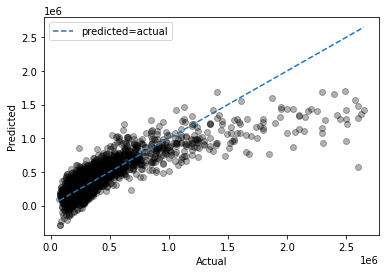

In [11]:
from model_inspector import get_inspector

inspector = get_inspector(lr, X_test, y_test)
ax = inspector.plot_pred_vs_act()

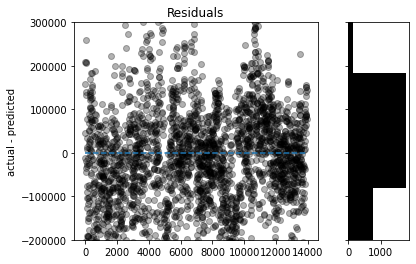

In [18]:
axes = inspector.plot_residuals()
axes[0].set_ylim([-200_000, 300_000]);

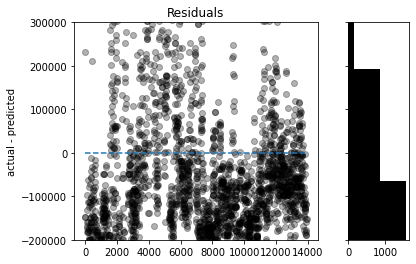

In [19]:
from sklearn.dummy import DummyRegressor

dummy_inspector = get_inspector(DummyRegressor().fit(X_train, y_train), X_test, y_test)
axes = dummy_inspector.plot_residuals()
axes[0].set_ylim([-200_000, 300_000]);

### Evaluating the Model

In [12]:
lr.score(X_train, y_train)

0.6964128983965503

In [13]:
lr.score(X_test, y_test)

0.6941982567245788

In [21]:
X.columns

Index(['LATITUDE', 'LONGITUDE', 'LND_SQFOOT', 'TOT_LVG_AREA', 'SPEC_FEAT_VAL',
       'RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI',
       'HWY_DIST', 'age', 'avno60plus', 'month_sold', 'structure_quality',
       'intercept'],
      dtype='object')

In [22]:
inspector.show_model()

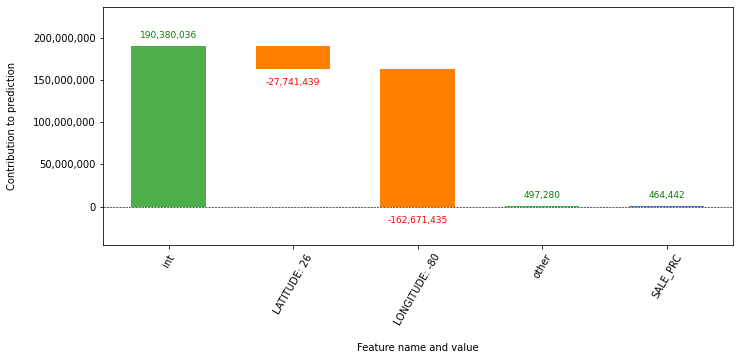

In [23]:
ax = inspector.plot_waterfall(
    X.iloc[0],
    bar_num_formatter=".0f",
    tick_num_formatter=".0f",
    sorted_value=False,
    rotation_value=60,
    threshold=0.02,
)
ax.get_figure().set_size_inches((12, 6))

### Data Visualization

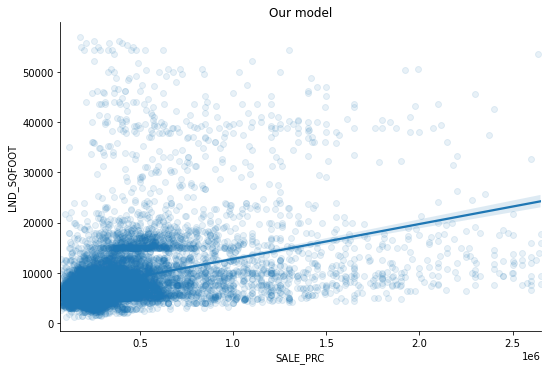

In [29]:
g = sns.lmplot(
    x="SALE_PRC",
    y="LND_SQFOOT",
    data=data,
    aspect=1.5,  # aspect ratio (width:height)
    scatter_kws={
        "alpha": 0.1
    },  # this is how you pass arguments to the underlying scatterplot
)
g.ax.set(title="Our model");

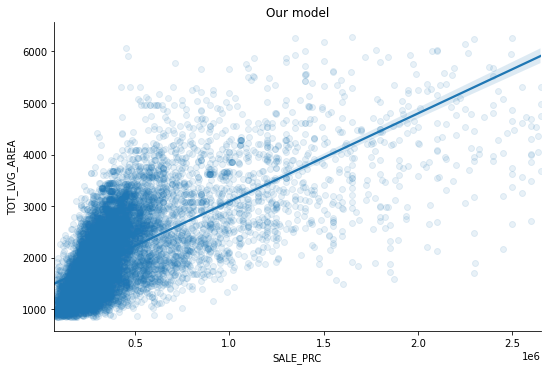

In [17]:
g = sns.lmplot(
    x="SALE_PRC",
    y="TOT_LVG_AREA",
    data=data,
    aspect=1.5,  # aspect ratio (width:height)
    scatter_kws={
        "alpha": 0.1
    },  # this is how you pass arguments to the underlying scatterplot
)
g.ax.set(title="Our model");

/Users/michael_giovanni/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


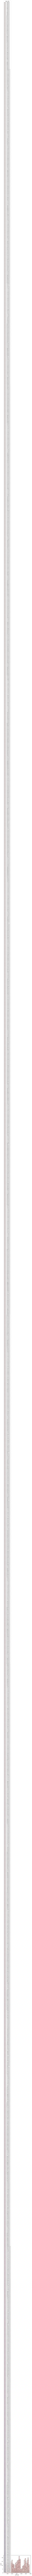

/Users/michael_giovanni/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


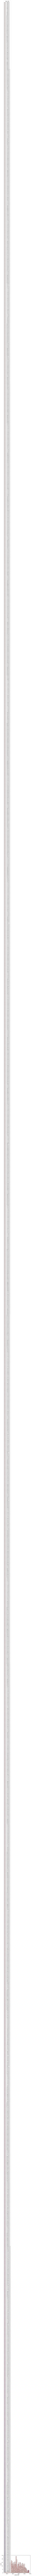

/Users/michael_giovanni/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


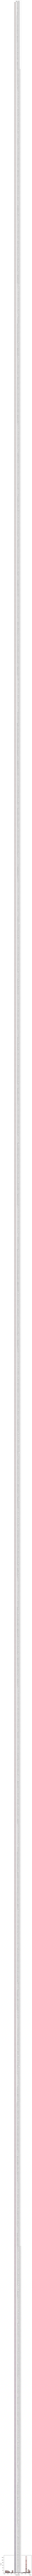

/Users/michael_giovanni/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


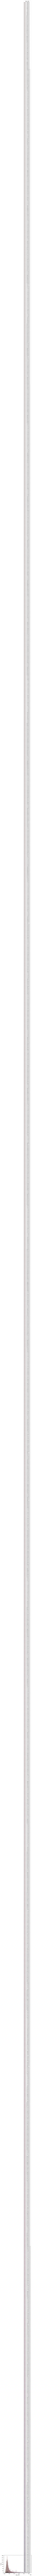

In [ ]:
for feat in data.columns:
    sns.histplot(data=data,x=feat, hue = "SALE_PRC")
    plt.show()

In [14]:
data_no_na = data.dropna()
data_no_na

LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
0      25.891031 -80.160561  622280070620  440000.0        9375          1753   
1      25.891324 -80.153968  622280100460  349000.0        9375          1715   
2      25.891334 -80.153740  622280100470  800000.0        9375          2276   
3      25.891765 -80.152657  622280100530  988000.0       12450          2058   
4      25.891825 -80.154639  622280100200  755000.0       12800          1684   
...          ...        ...           ...       ...         ...           ...   
13927  25.783130 -80.259795  131320040990  275000.0        6780           967   
13928  25.783585 -80.260354  131320040910  340000.0        7500          1854   
13929  25.783793 -80.256126  131320040420  287500.0        8460          1271   
13930  25.784007 -80.257542  131320040330  315000.0        7500          1613   
13931  25.784387 -80.258901  131320040700  250000.0        8833          1867   

       SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  CNTR_DIST  \
0                  0     2815.9     12811.4       347.6    42815.3   
1                  0     4359.1     10648.4       337.8    43504.9   
2              49206     4412.9     10574.1       297.1    43530.4   
3              10033     4585.0     10156.5         0.0    43797.5   
4              16681     4063.4     10836.8       326.6    43599.7   
...              ...        ...         ...         ...        ...   
13927           6580     3844.5     20568.0      3252.4    22175.9   
13928           2544     3593.6     20791.9      3077.7    22375.1   
13929           2064     4143.2     20307.9      3588.4    20966.9   
13930           3136     3986.9     20542.6      3589.1    21475.6   
13931            266     3793.9     20859.6      3421.0    21928.6   

       SUBCNTR_DI  HWY_DIST  age  avno60plus  month_sold  structure_quality  
0         37742.2   15954.9   67           0           8                  4  
1         37340.5   18125.0   63           0           9                  4  
2         37328.7   18200.5   61           0           2                  4  
3         37423.2   18514.4   63           0           9                  4  
4         37550.8   17903.4   42           0           7                  4  
...           ...       ...  ...         ...         ...                ...  
13927     12150.1     917.4   16           0           4                  4  
13928     12316.8     738.2   26           0           5                  4  
13929     12433.0     743.7   16           0           7                  4  
13930     12458.0     626.1   16           0           8                  4  
13931     12599.0     474.7   62           0          11                  4  

[13932 rows x 17 columns]

## 6. Model Evaluation
Evaluating the model, I conclude that the linear regression model is a good model to try off as the dataset supports the model with its linearity and values. The R-squared value for the model reaches up to 70% which is pretty impressive. In the next steps of improving my projects and models, I plan to use more methods of ML model techniques: heatmaps, confusion matrices, or decision trees. With this in mind, I believe implement ensembling to average all the models I used in a project will help me build stronger models to promote my business.

